Using tech stack column: Where do you primarily work in the tech stack
Using helpfulness column: On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?


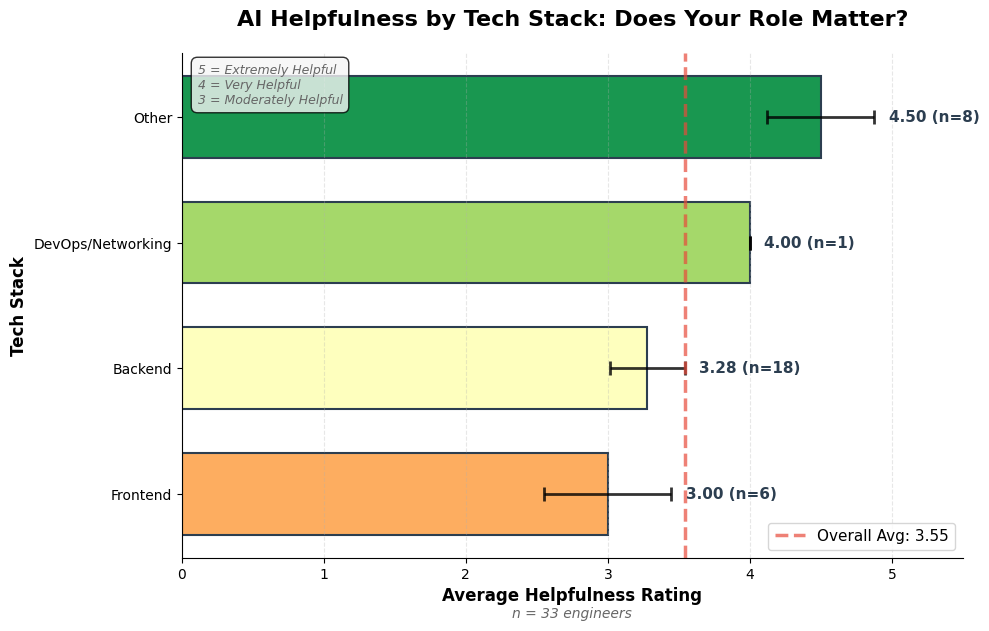


AI HELPFULNESS BY TECH STACK ANALYSIS

📊 Overall Average Helpfulness: 3.55/5.0
   Total Engineers: 33

💻 Tech Stack Sentiment Rankings (Highest to Lowest):
Rank   Tech Stack                Avg Rating   Count    vs Avg    
1      Other                     4.50         8        +0.95     
2      DevOps/Networking         4.00         1        +0.45     
3      Backend                   3.28         18       -0.27     
4      Frontend                  3.00         6        -0.55     

✨ Key Insights:
   🏆 Highest Satisfaction: Other (4.50/5.0)
   📉 Lowest Satisfaction: Frontend (3.00/5.0)
   📊 Difference: 1.50 points

   • 2 tech stacks rate AI above average
   • 2 tech stacks rate AI below average

   • Rating spread (std dev): 0.68
     → High spread indicates varying satisfaction by tech stack

💡 Interpretation:
   • AI satisfaction varies by role - consider targeted support for lower-rated stacks

   🔍 Backend vs Frontend Comparison:
      Backend: 3.28/5.0 (n=18)
      Frontend: 3.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
tech_stack_col = df_filtered.columns[11]  # Column L - Tech stack
helpfulness_col = df_filtered.columns[15]  # Column P - Helpfulness rating

print(f"Using tech stack column: {tech_stack_col}")
print(f"Using helpfulness column: {helpfulness_col}")

# Create numeric mapping for helpfulness
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Calculate average helpfulness by tech stack
tech_stack_stats = df_filtered.groupby(tech_stack_col)['rating_numeric'].agg(['mean', 'count', 'std']).reset_index()
# Calculate standard error of the mean (SEM)
tech_stack_stats['std'] = tech_stack_stats['std'].fillna(0)  # Handle NaN values for single-item groups
tech_stack_stats['SEM'] = tech_stack_stats['std'] / np.sqrt(tech_stack_stats['count'])
tech_stack_stats = tech_stack_stats.sort_values('mean', ascending=True)

# Calculate overall average
overall_avg = df_filtered['rating_numeric'].mean()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.4))

# Create color gradient based on rating (red-yellow-green)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(tech_stack_stats)))

# Create horizontal bar chart with error bars (using standard error of the mean)
bars = ax.barh(tech_stack_stats[tech_stack_col], tech_stack_stats['mean'], 
               xerr=tech_stack_stats['SEM'], 
               color=colors, height=0.65, edgecolor='#2C3E50', 
               linewidth=1.5, capsize=5, error_kw={'linewidth': 2, 'capthick': 2, 'alpha': 0.8})

# Add value labels with count (positioned after error bar)
for bar, avg, count, sem in zip(bars, tech_stack_stats['mean'], 
                                 tech_stack_stats['count'], tech_stack_stats['SEM']):
    # Position label after the bar + error bar
    label_x = avg + sem + 0.1
    ax.text(label_x, bar.get_y() + bar.get_height()/2, 
            f'{avg:.2f} (n={int(count)})', 
            va='center', fontsize=11, weight='bold', color='#2C3E50')

# Add overall average line
ax.axvline(overall_avg, color='#E74C3C', linestyle='--', linewidth=2.5, 
          alpha=0.7, label=f'Overall Avg: {overall_avg:.2f}')

# Customize plot
ax.set_xlabel('Average Helpfulness Rating', fontsize=12, weight='bold')
ax.set_ylabel('Tech Stack', fontsize=12, weight='bold')
ax.set_title('AI Helpfulness by Tech Stack: Does Your Role Matter?', 
            fontsize=16, weight='bold', pad=20)
# Set xlim to accommodate error bars
max_with_error = (tech_stack_stats['mean'] + tech_stack_stats['SEM']).max()
ax.set_xlim(0, max(5.5, max_with_error + 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add rating scale reference
ax.text(0.02, 0.98, '5 = Extremely Helpful\n4 = Very Helpful\n3 = Moderately Helpful', 
        transform=ax.transAxes, ha='left', va='top',
        fontsize=9, style='italic', color='#666666',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', alpha=0.8))

# Add subtitle
plt.text(0.5, -0.12, f'n = {len(df_filtered)} engineers', 
         ha='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("AI HELPFULNESS BY TECH STACK ANALYSIS")
print("="*80)

print(f"\n📊 Overall Average Helpfulness: {overall_avg:.2f}/5.0")
print(f"   Total Engineers: {len(df_filtered)}")

print(f"\n💻 Tech Stack Sentiment Rankings (Highest to Lowest):")
print(f"{'Rank':<6} {'Tech Stack':<25} {'Avg Rating':<12} {'Count':<8} {'vs Avg':<10}")
print("="*80)

for i, (_, row) in enumerate(tech_stack_stats.sort_values('mean', ascending=False).iterrows(), 1):
    stack = row[tech_stack_col]
    avg = row['mean']
    count = int(row['count'])
    diff = avg - overall_avg
    
    # Determine if above or below average
    comparison = f"+{diff:.2f}" if diff > 0 else f"{diff:.2f}"
    
    print(f"{i:<6} {stack:<25} {avg:<12.2f} {count:<8} {comparison:<10}")

print(f"\n✨ Key Insights:")

# Top tech stack
top_stack = tech_stack_stats.iloc[-1]
bottom_stack = tech_stack_stats.iloc[0]

print(f"   🏆 Highest Satisfaction: {top_stack[tech_stack_col]} ({top_stack['mean']:.2f}/5.0)")
print(f"   📉 Lowest Satisfaction: {bottom_stack[tech_stack_col]} ({bottom_stack['mean']:.2f}/5.0)")
print(f"   📊 Difference: {top_stack['mean'] - bottom_stack['mean']:.2f} points")

# Tech stacks above/below average
above_avg = tech_stack_stats[tech_stack_stats['mean'] > overall_avg]
below_avg = tech_stack_stats[tech_stack_stats['mean'] < overall_avg]
at_avg = tech_stack_stats[abs(tech_stack_stats['mean'] - overall_avg) < 0.1]

print(f"\n   • {len(above_avg)} tech stacks rate AI above average")
print(f"   • {len(below_avg)} tech stacks rate AI below average")
if len(at_avg) > 0:
    print(f"   • {len(at_avg)} tech stacks rate AI at average")

# Calculate spread
rating_spread = tech_stack_stats['mean'].std()
print(f"\n   • Rating spread (std dev): {rating_spread:.2f}")
if rating_spread < 0.3:
    print(f"     → Low spread indicates consistent satisfaction across tech stacks")
elif rating_spread > 0.5:
    print(f"     → High spread indicates varying satisfaction by tech stack")
else:
    print(f"     → Moderate spread indicates some variation across tech stacks")

print(f"\n💡 Interpretation:")
if len(above_avg) == len(tech_stack_stats):
    print(f"   • All tech stacks find AI helpful - this is company-wide success!")
elif len(below_avg) == 0:
    print(f"   • No tech stack rates AI below average - strong adoption across all roles")
else:
    print(f"   • AI satisfaction varies by role - consider targeted support for lower-rated stacks")
    
# Check if backend vs frontend difference exists
backend_data = df_filtered[df_filtered[tech_stack_col] == 'Backend']['rating_numeric']
frontend_data = df_filtered[df_filtered[tech_stack_col] == 'Frontend']['rating_numeric']

if len(backend_data) > 0 and len(frontend_data) > 0:
    backend_avg = backend_data.mean()
    frontend_avg = frontend_data.mean()
    print(f"\n   🔍 Backend vs Frontend Comparison:")
    print(f"      Backend: {backend_avg:.2f}/5.0 (n={len(backend_data)})")
    print(f"      Frontend: {frontend_avg:.2f}/5.0 (n={len(frontend_data)})")
    print(f"      Difference: {abs(backend_avg - frontend_avg):.2f} points")

print("\n" + "="*80 + "\n")